* https://towardsdatascience.com/detection-of-price-support-and-resistance-levels-in-python-baedc44c34c9

* https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/1_Modelling/Equation%20solving%20tools.html
* https://github.com/alchemyst/Dynamics-and-Control

In [1]:
import numpy
print(numpy.log2(260000 / 40000 / 0.04))
print(480 // int(numpy.log2(260000 / 40000 / 0.04)) * 2)

7.344295907915817
136


In [2]:
import numpy
print(numpy.log2(400000 / 40000 / 0.04))
print(1200 // int(numpy.log2(400000 / 40000 / 0.04)) * 2)

7.965784284662087
342


In [3]:
import numpy
print(numpy.log2(400000 / 40000 / 0.0001))
print(5000 // int(numpy.log2(400000 / 40000 / 0.0001)) * 2)

16.609640474436812
624


In [4]:
BUY_AMOUNT = 0.1
MAX_USED_JPY = 400000
print(numpy.log2(MAX_USED_JPY / 40000 / BUY_AMOUNT))
print(5000 // int(numpy.log2(MAX_USED_JPY / 40000 / BUY_AMOUNT)) * 2)

6.643856189774724
1666


## Calculate the Threshold for Adding Warehouse
``` python
M = 400000 / 40000 / 0.0001
D = 5000
(g + h * c) / (1 + c) - h == ( g + h * c - h * (1 + c) ) / (1 + c) == (g - h) / (1 + c)
g - (g + h * c) / (1 + c) == (g - h) / (1 + c) * c
(1 + c) ** n == M
import math
n == math.log(M, 1 + c)
d == abs(g - h)
D <= d / (1 + c) * c * n
(1 + c) ** (D / d * (1 + c) / c) == M
(1 + c) ** ((1 + c) / c) == M ** (d / D)
d >= D / math.log(M, 1 + c) / c * (1 + c)
d >= D * math.log(1 + c, M) / c * (1 + c)
```

In [5]:
%%bash
sudo -HE pip install sympy

In [6]:
M = 400000 / 40000 / 0.1
D = 5000

import sympy
c_sym = sympy.Symbol('c')
abs(complex(sympy.limit(D / sympy.log(M, 1 + c_sym) / c_sym * (1 + c_sym), c_sym, -1)))

0.0

In [7]:
import sympy
c_sym = sympy.Symbol('c')
(D / sympy.log(M, 1 + c_sym) / c_sym * (1 + c_sym)).subs({M: 400000 / 40000 / 0.1, D: 5000})

1085.73620475813*(c + 1)*log(c + 1)/c

In [8]:
import math
from scipy import optimize as opt

M = 400000 / 40000 / 0.1
D = 5000

def c(d):
    return opt.fsolve(lambda c: d - D / math.log(M, 1 + c) / c * (1 + c), -0.5)[0]

c(D / math.log(M))

-3.47571723131338e-08

In [9]:
import math
from scipy import optimize as opt

M = 400000 / 40000 / 0.1
D = 5000

def c(d):
    return opt.fsolve(lambda c: [d - D / math.log(M, 1 + c[0]) / c[0] * (1 + c[0])], [-0.5])[0]

c(D / math.log(M))

-3.47571723131338e-08

In [10]:
import numpy.lib.scimath as math
from scipy import optimize as opt

M = 400000 / 40000 / 0.1
D = 5000

def c(d):
    return opt.root(lambda c: d - D / math.log(M) * math.log(1 + c) / c * (1 + c), -0.5, method='lm').x[0]

c(D / math.log(M))

-2.577654416769573e-06

In [11]:
import numpy.lib.scimath as math
from scipy import optimize as opt

M = 400000 / 40000 / 0.1
D = 5000

def c(d):
    return opt.root(lambda c: [(d - D / math.log(M) * math.log(1 + c[0]) / c[0] * (1 + c[0])).real], [-0.5], method='lm').x[0]

c(D / math.log(M))

-2.577654416769573e-06

In [12]:
import numpy.lib.scimath as math
from scipy import optimize as opt

M = 400000 / 40000 / 0.1
D = 5000

def c(d):
    return opt.fsolve(lambda c: [(d - D / math.log(M) * math.log(1 + c[0]) / c[0] * (1 + c[0])).real], [-0.5])[0]

c(0)

-0.9999999998665055

In [13]:
import numpy.lib.scimath as math
from scipy import optimize as opt

M = 400000 / 40000 / 0.1
D = 5000

def c(d):
    return opt.fsolve(lambda c: [(d - D / math.log(M) * math.log(1 + c[0]) / c[0] * (1 + c[0])).real], [-0.5])[0]

c(D / math.log(M))

-7.21773782363743e-09

In [14]:
import matplotlib.pyplot as plt
plt.close('all')

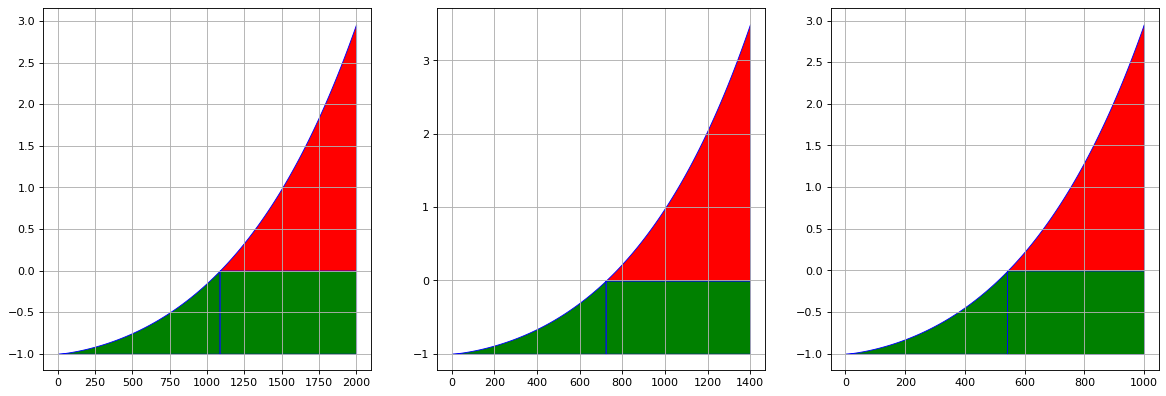

In [15]:
import matplotlib.pyplot as plt
plt.close('all')

fig, (plt_a, plt_b, plt_c) = plt.subplots(1, 3, figsize=(18, 6), dpi=80)

# ---
M = 400000 / 40000 / 0.1
D = 5000

d0 = int(D / math.log(M))

# ---
plt_a.grid(True)
plt_a.fill_between(
    range(0, d0), [c(d) for d in range(0, d0)], [-1 for d in range(0, d0)],
    edgecolor='blue', linewidth=0.8, facecolor='green'
)
plt_a.fill_between(
    range(d0, 2000), [0 for d in range(d0, 2000)], [-1 for d in range(d0, 2000)],
    edgecolor='blue', linewidth=0.8, facecolor='green'
)
plt_a.fill_between(
    range(d0, 2000), [c(d) for d in range(d0, 2000)], [0 for d in range(d0, 2000)],
    edgecolor='blue', linewidth=0.8, facecolor='red'
)

# ---
M = 400000 / 40000 / 0.01
D = 5000

d0 = int(D / math.log(M))

# ---
plt_b.grid(True)
plt_b.fill_between(
    range(0, d0), [c(d) for d in range(0, d0)], [-1 for d in range(0, d0)],
    edgecolor='blue', linewidth=0.8, facecolor='green'
)
plt_b.fill_between(
    range(d0, 1400), [0 for d in range(d0, 1400)], [-1 for d in range(d0, 1400)],
    edgecolor='blue', linewidth=0.8, facecolor='green'
)
plt_b.fill_between(
    range(d0, 1400), [c(d) for d in range(d0, 1400)], [0 for d in range(d0, 1400)],
    edgecolor='blue', linewidth=0.8, facecolor='red'
)

# ---
M = 400000 / 40000 / 0.001
D = 5000

d0 = int(D / math.log(M))

# ---
plt_c.grid(True)
plt_c.fill_between(
    range(0, d0), [c(d) for d in range(0, d0)], [-1 for d in range(0, d0)],
    edgecolor='blue', linewidth=0.8, facecolor='green'
)
plt_c.fill_between(
    range(d0, 1000), [0 for d in range(d0, 1000)], [-1 for d in range(d0, 1000)],
    edgecolor='blue', linewidth=0.8, facecolor='green'
)
plt_c.fill_between(
    range(d0, 1000), [c(d) for d in range(d0, 1000)], [0 for d in range(d0, 1000)],
    edgecolor='blue', linewidth=0.8, facecolor='red'
)

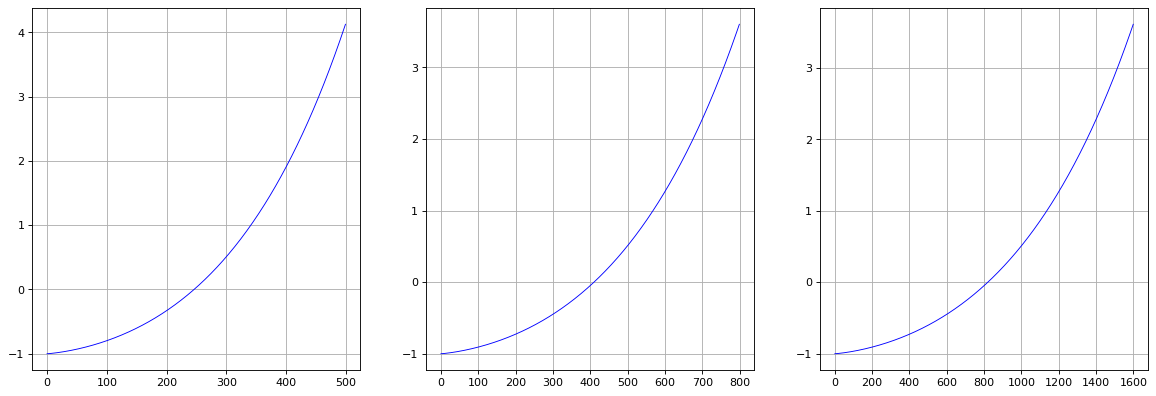

In [16]:
import matplotlib.pyplot as plt
plt.close('all')

fig, (plt_a, plt_b, plt_c) = plt.subplots(1, 3, figsize=(18, 6), dpi=80)

# ---
M = 800000 / 40000 / 0.0001
D = 3000

# ---
plt_a.grid(True)
plt_a.plot(range(0, 500), [c(d) for d in range(0, 500)], 'b-', linewidth=0.8)

# ---
M = 800000 / 40000 / 0.0001
D = 5000

# ---
plt_b.grid(True)
plt_b.plot(range(0, 800), [c(d) for d in range(0, 800)], 'b-', linewidth=0.8)

# ---
M = 800000 / 40000 / 0.0001
D = 10000

# ---
plt_c.grid(True)
plt_c.plot(range(0, 1600), [c(d) for d in range(0, 1600)], 'b-', linewidth=0.8)

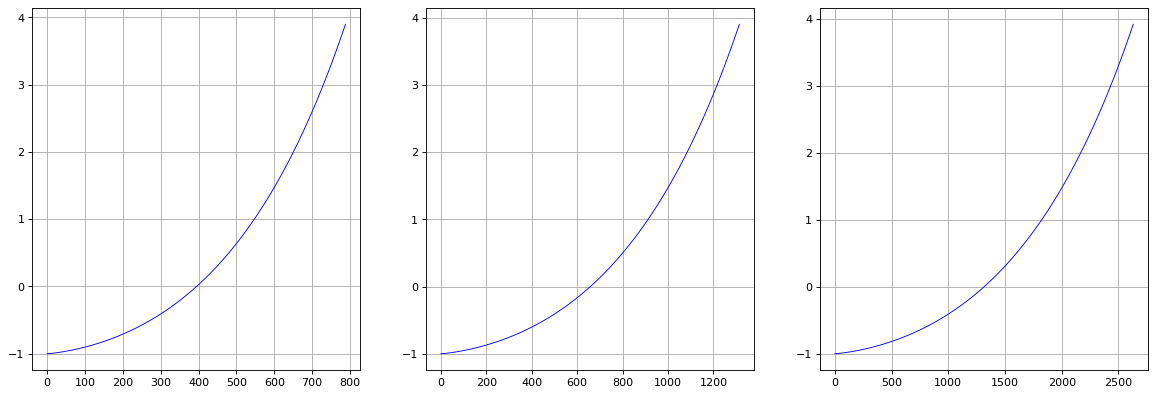

In [17]:
import numpy.lib.scimath as math
from scipy import optimize as opt

def c(d):
    return opt.fsolve(lambda c: [(d - D / math.log(M) * math.log(1 + c[0]) / c[0] * (1 + c[0])).real], [-0.5])[0]

# ---
import matplotlib.pyplot as plt
plt.close('all')

fig, (plt_a, plt_b, plt_c) = plt.subplots(1, 3, figsize=(18, 6), dpi=80)

# ---
M = 800000 / 40000 / 0.01
D = 3000
d_max = int(D / math.log(M) * 2)

# ---
plt_a.grid(True)
plt_a.plot(range(0, d_max), [c(d) for d in range(0, d_max)], 'b-', linewidth=0.8)

# ---
M = 800000 / 40000 / 0.01
D = 5000
d_max = int(D / math.log(M) * 2)

# ---
plt_b.grid(True)
plt_b.plot(range(0, d_max), [c(d) for d in range(0, d_max)], 'b-', linewidth=0.8)

# ---
M = 800000 / 40000 / 0.01
D = 10000
d_max = int(D / math.log(M) * 2)

# ---
plt_c.grid(True)
plt_c.plot(range(0, d_max), [c(d) for d in range(0, d_max)], 'b-', linewidth=0.8)

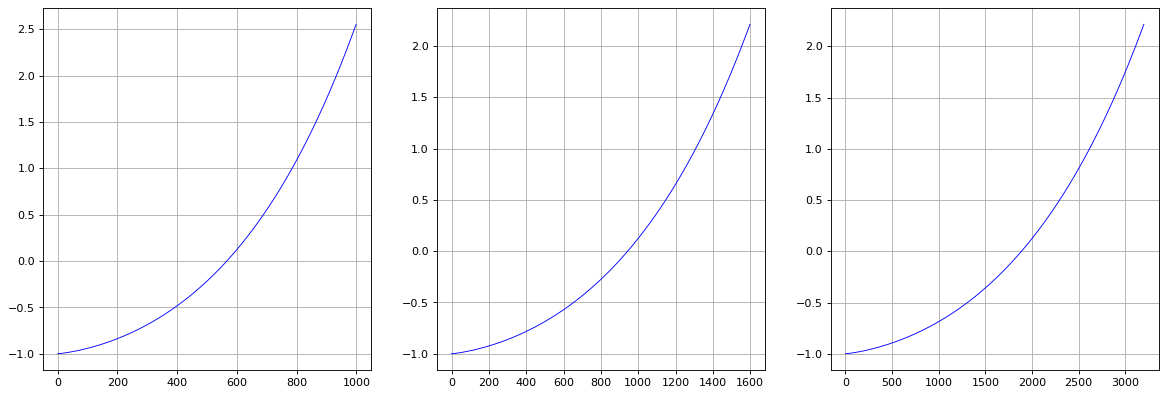

In [18]:
import numpy.lib.scimath as math
from scipy import optimize as opt

def c(d):
    return opt.fsolve(lambda c: [(d - D / math.log(M) * math.log(1 + c[0]) / c[0] * (1 + c[0])).real], [-0.5])[0]

# ---
import matplotlib.pyplot as plt
plt.close('all')

fig, (plt_a, plt_b, plt_c) = plt.subplots(1, 3, figsize=(18, 6), dpi=80)

# ---
M = 800000 / 40000 / 0.1
D = 3000

# ---
plt_a.grid(True)
plt_a.plot(range(0, 1000), [c(d) for d in range(0, 1000)], 'b-', linewidth=0.8)

# ---
M = 800000 / 40000 / 0.1
D = 5000

# ---
plt_b.grid(True)
plt_b.plot(range(0, 1600), [c(d) for d in range(0, 1600)], 'b-', linewidth=0.8)

# ---
M = 800000 / 40000 / 0.1
D = 10000

# ---
plt_c.grid(True)
plt_c.plot(range(0, 3200), [c(d) for d in range(0, 3200)], 'b-', linewidth=0.8)

In [19]:
import sympy
M, D, c, d = sympy.symbols('M, D, c, d')
f1 = M - 400000 / 40000 / 0.1
f2 = D - 5000
f3 = d - D * sympy.log(1 + c, M) / c * (1 + c)
f4 = d - 600
# sympy.solve([f1, f2, f3, f4])

In [20]:
import sympy
M, D, c = sympy.symbols('M, D, c')
d = D / sympy.log(M, 1 + c) / c * (1 + c)
d0 = sympy.limit(d, c, 0)
d0

D/log(M)

In [21]:
import sympy
M, D, c = sympy.symbols('M, D, c')
d = D * sympy.log(1 + c, M) / c * (1 + c)
d0 = sympy.limit(d, c, 0)
d0

D/log(M)

In [22]:
import sympy
M, D, c = sympy.symbols('M, D, c')
d = D * sympy.log(1 + c, M) / c * (1 + c)
d0 = sympy.limit(d, c, -1)
d0

0

In [23]:
type(c)

sympy.core.symbol.Symbol

In [24]:
type(d0)

sympy.core.numbers.Zero

In [25]:
print(d0)

0


In [26]:
sympy.limit(sympy.limit(d0, M, 400000 / 40000 / 0.1), D, 2000)

0

In [27]:
Mn = 400000 / 40000 / 0.1
Dn = 2000

import numpy
# numpy.info(numpy.log)
Dn / numpy.log(Mn)

434.2944819032518

In [28]:
sympy.limit(sympy.limit(sympy.limit(d, c, 0.001), M, 400000 / 40000 / 0.1), D, 2000)

434.511556797911

In [29]:
sympy.limit(sympy.limit(sympy.limit(d, c, 0.01), M, 400000 / 40000 / 0.1), D, 2000)

436.458752046900

In [30]:
sympy.limit(sympy.limit(sympy.limit(d, c, 0.1), M, 400000 / 40000 / 0.1), D, 2000)

455.319536740476

In [31]:
import matplotlib.pyplot as plt
plt.close('all')

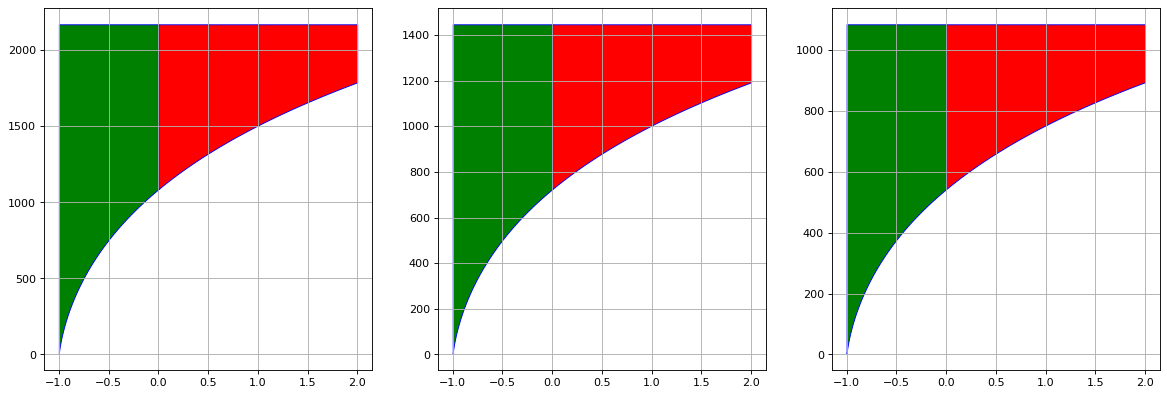

In [32]:
import matplotlib.pyplot as plt
plt.close('all')

fig, (plt_a, plt_b, plt_c) = plt.subplots(1, 3, figsize=(18, 6), dpi=80)

import math
import numpy as np

# ---
M = 400000 / 40000 / 0.1
D = 5000
d_max = int(D / math.log(M) * 2)

# ---
plt_a.grid(True)

c_array = np.arange(-0.9995, 0.0005, 0.001)
plt_a.fill_between(
    c_array, [D / math.log(M, (1 + c)) / c * (1 + c) for c in c_array], [d_max for i in c_array],
    edgecolor='blue', linewidth=0.8, facecolor='green'
)

c_array = np.arange(0.0005, 2.0005, 0.001)
plt_a.fill_between(
    c_array, [D / math.log(M, (1 + c)) / c * (1 + c) for c in c_array], [d_max for i in c_array],
    edgecolor='blue', linewidth=0.8, facecolor='red'
)

# ---
M = 400000 / 40000 / 0.01
D = 5000
d_max = int(D / math.log(M) * 2)

# ---
plt_b.grid(True)

c_array = np.arange(-0.9995, 0.0005, 0.001)
plt_b.fill_between(
    c_array, [D / math.log(M, (1 + c)) / c * (1 + c) for c in c_array], [d_max for i in c_array],
    edgecolor='blue', linewidth=0.8, facecolor='green'
)

c_array = np.arange(0.0005, 2.0005, 0.001)
plt_b.fill_between(
    c_array, [D / math.log(M, (1 + c)) / c * (1 + c) for c in c_array], [d_max for i in c_array],
    edgecolor='blue', linewidth=0.8, facecolor='red'
)

# ---
M = 400000 / 40000 / 0.001
D = 5000
d_max = int(D / math.log(M) * 2)

# ---
plt_c.grid(True)

c_array = np.arange(-0.9995, 0.0005, 0.001)
plt_c.fill_between(
    c_array, [D / math.log(M, (1 + c)) / c * (1 + c) for c in c_array], [d_max for i in c_array],
    edgecolor='blue', linewidth=0.8, facecolor='green'
)

c_array = np.arange(0.0005, 2.0005, 0.001)
plt_c.fill_between(
    c_array, [D / math.log(M, (1 + c)) / c * (1 + c) for c in c_array], [d_max for i in c_array],
    edgecolor='blue', linewidth=0.8, facecolor='red'
)

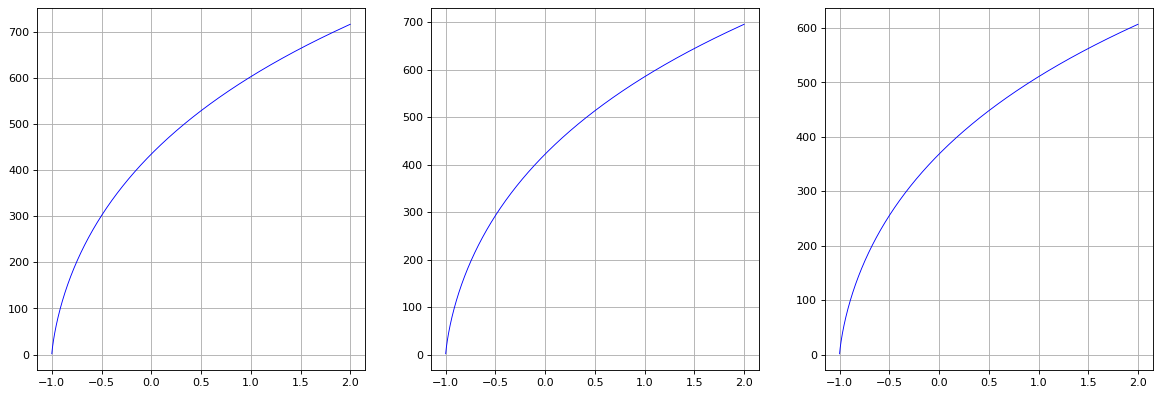

In [33]:
import matplotlib.pyplot as plt
plt.close('all')

fig, (plt_a, plt_b, plt_c) = plt.subplots(1, 3, figsize=(18, 6), dpi=80)

# ---
M = 400000 / 40000 / 0.1
D = 2000

# ---
import numpy as np
c_array = np.arange(-0.9995, 2.0005, 0.001)

import math
d_array = [D / math.log(M, (1 + c)) / c * (1 + c) for c in c_array]

plt_a.grid(True)
plt_a.plot(c_array, d_array, 'b-', linewidth=0.8)

# ---
M = 400000 / 35000 / 0.1
D = 2000

# ---
import numpy as np
c_array = np.arange(-0.9995, 2.0005, 0.001)

import math
d_array = [D / math.log(M, (1 + c)) / c * (1 + c) for c in c_array]

plt_b.grid(True)
plt_b.plot(c_array, d_array, 'b-', linewidth=0.8)

# ---
M = 800000 / 35000 / 0.1
D = 2000

# ---
import numpy as np
c_array = np.arange(-0.9995, 2.0005, 0.001)

import math
d_array = [D / math.log(M, (1 + c)) / c * (1 + c) for c in c_array]

plt_c.grid(True)
plt_c.plot(c_array, d_array, 'b-', linewidth=0.8)

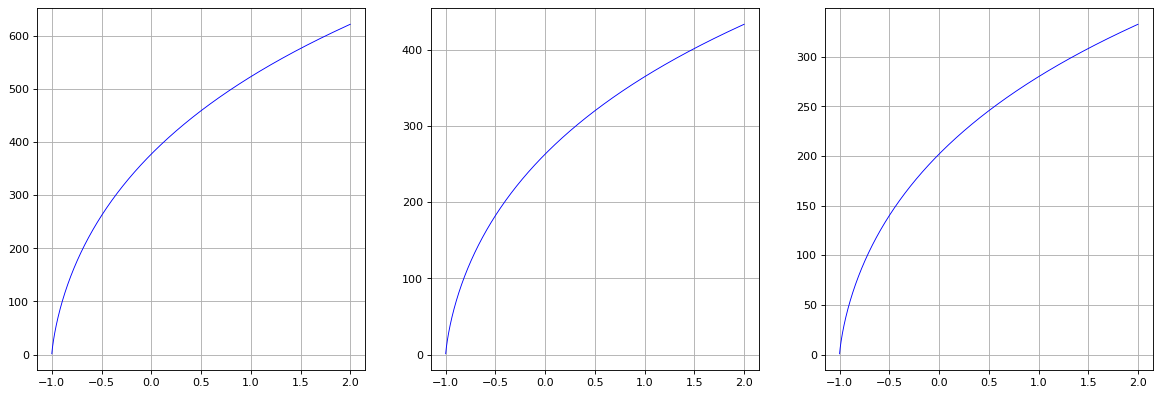

In [34]:
import matplotlib.pyplot as plt
plt.close('all')

fig, (plt_a, plt_b, plt_c) = plt.subplots(1, 3, figsize=(18, 6), dpi=80)

# ---
M = 800000 / 40000 / 0.1
D = 2000

# ---
import numpy as np
c_array = np.arange(-0.9995, 2.0005, 0.001)

import math
d_array = [D / math.log(M, (1 + c)) / c * (1 + c) for c in c_array]

plt_a.grid(True)
plt_a.plot(c_array, d_array, 'b-', linewidth=0.8)

# ---
M = 800000 / 40000 / 0.01
D = 2000

# ---
import numpy as np
c_array = np.arange(-0.9995, 2.0005, 0.001)

import math
d_array = [D / math.log(M, (1 + c)) / c * (1 + c) for c in c_array]

plt_b.grid(True)
plt_b.plot(c_array, d_array, 'b-', linewidth=0.8)

# ---
M = 800000 / 40000 / 0.001
D = 2000

# ---
import numpy as np
c_array = np.arange(-0.9995, 2.0005, 0.001)

import math
d_array = [D / math.log(M, (1 + c)) / c * (1 + c) for c in c_array]

plt_c.grid(True)
plt_c.plot(c_array, d_array, 'b-', linewidth=0.8)

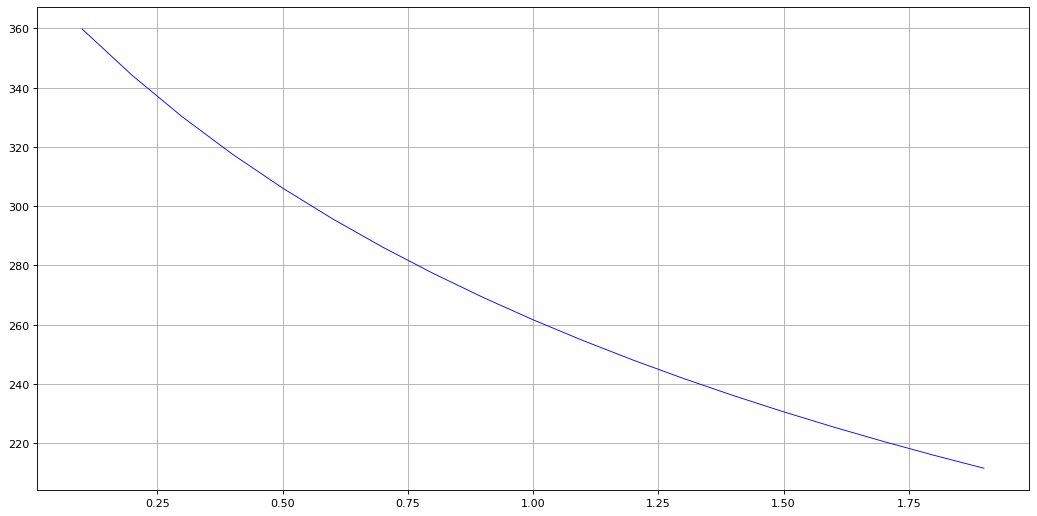

In [35]:
M = 800000 / 40000 / 0.1
D = 2000

import numpy as np
c_array = np.arange(0.1, 2, 0.1)

import math
d_array = [D / math.log(M, (1 + c)) / c for c in c_array]

import matplotlib.pyplot as plt
plt.close('all')

plt.figure(figsize=(16, 8), dpi=80)
plt.grid(True)

plt.plot(c_array, d_array, 'b-', linewidth=0.8)

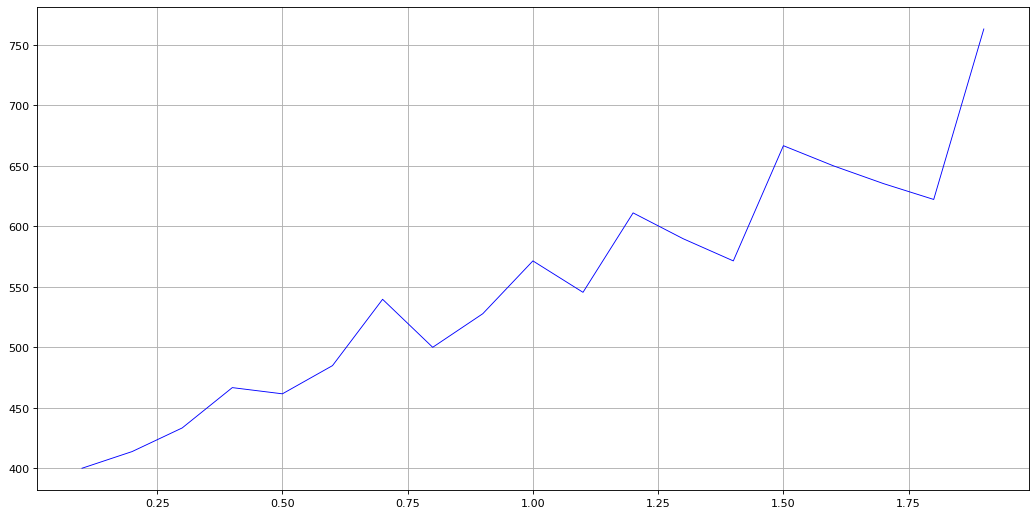

In [36]:
M = 800000 / 40000 / 0.1
D = 2000

import numpy as np
c_array = np.arange(0.1, 2, 0.1)

import math
d_array = [D / int(math.log(M, (1 + c))) / c * (1 + c) for c in c_array]

import matplotlib.pyplot as plt
plt.close('all')

plt.figure(figsize=(16, 8), dpi=80)
plt.grid(True)

plt.plot(c_array, d_array, 'b-', linewidth=0.8)

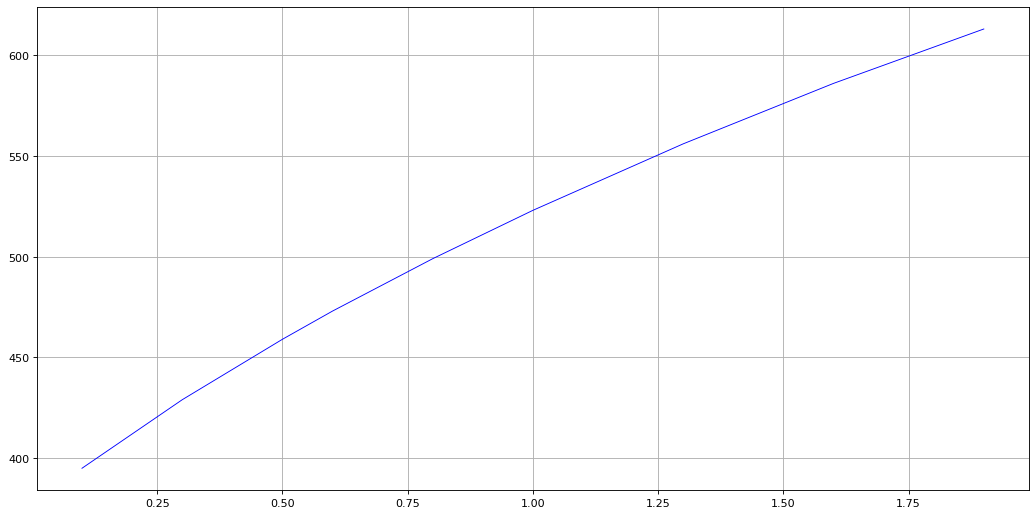

In [37]:
M = 800000 / 40000 / 0.1
D = 2000

import numpy as np
c_array = np.arange(0.1, 2, 0.1)

import math
d_array = [int(D / math.log(M, (1 + c)) / c * (1 + c)) for c in c_array]

import matplotlib.pyplot as plt
plt.close('all')

plt.figure(figsize=(16, 8), dpi=80)
plt.grid(True)

plt.plot(c_array, d_array, 'b-', linewidth=0.8)

In [38]:
import math
M = 800000 / 40000 / 0.1
D = 39900 - 38300
c = 0.1
print(math.log(M, (1 + c)))
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

55.590256753535286
319.0
290.0


In [39]:
import math
M = 800000 / 40000 / 0.1
D = 39900 - 38300 # 39516 - 38177 = 1339
c = 0.5
print(math.log(M, (1 + c)))
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

13.0672584658866
369.0
246.0


In [40]:
import math
M = 800000 / 40000 / 0.01
D = 3000
c = 0.5
print(math.log(M, (1 + c)))
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

18.746132053154174
498.0
332.0


In [41]:
import math
M = 800000 / 40000 / 0.1
D = 39900 - 38300
c = 1
print(math.log(M, (1 + c)))
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

7.643856189774724
456.0
228.0


In [42]:
import math
M = 800000 / 40000 / 0.1
D = 39900 - 38300
c = 2
print(math.log(M, (1 + c)))
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

4.822736302150226
600.0
200.0


In [43]:
import math
M = 800000 / 40000 / 0.1
D = 3000
c = 0.5
print(math.log(M, (1 + c)))
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

13.0672584658866
690.0
460.0


In [44]:
import math
M = 800000 / 40000 / 0.01
D = 3000
c = 0.5
print(math.log(M, (1 + c)))
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

18.746132053154174
498.0
332.0


In [45]:
import math
M = 800000 / 40000 / 0.001
D = 3000
c = 0.5
print(math.log(M, (1 + c)))
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

24.425005640421745
375.0
250.0


In [46]:
import math
M = 800000 / 40000 / 0.0001
D = 3000
c = 0.5
print(math.log(M, (1 + c)))
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

30.10387922768932
300.0
200.0


In [47]:
import math
M = 400000 / 40000 / 0.0001
D = 5000
c = 0.1
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

451.00000000000006
410.0


In [48]:
import math
M = 400000 / 40000 / 0.1
D = 5000
c = 0.5
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

1362.0
908.0


In [49]:
import math
M = 400000 / 40000 / 0.0001
D = 5000
c = 0.5
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

534.0
356.0


In [50]:
import math
M = 800000 / 40000 / 0.0001
D = 5000
c = 0.5
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

498.0
332.0


In [51]:
import math
M = 400000 / 40000 / 0.1
d = 512
c = 0.5
print(math.log(M, (1 + c)))
print(d / (1 + c) * c * int(math.log(M, (1 + c))))

11.357747174535147
1877.3333333333333


In [52]:
# 破了支撑之后转入最小额度交易
import math
M = 400000 / 40000 / 0.0001
d = 512
c = 0.5
print(math.log(M, (1 + c)))
print(d / (1 + c) * c * int(math.log(M, (1 + c))))

28.394367936337865
4778.666666666666


In [53]:
import math
M = 800000 / 40000 / 0.1
d = 512
c = 0.5
print(math.log(M, (1 + c)))
print(d / (1 + c) * c * int(math.log(M, (1 + c))))

13.0672584658866
2218.6666666666665


In [54]:
import math
M = 800000 / 40000 / 0.01
d = 512
c = 0.5
print(math.log(M, (1 + c)))
print(d / (1 + c) * c * int(math.log(M, (1 + c))))

18.746132053154174
3072.0


In [55]:
# 破了支撑之后转入最小额度交易
import math
M = 800000 / 40000 / 0.0001
d = 512
c = 0.5
print(math.log(M, (1 + c)))
print(d / (1 + c) * c * int(math.log(M, (1 + c))))

30.10387922768932
5120.0


In [56]:
import math
M = 400000 / 40000 / 0.0001
D = 5000
c = 1
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

624.0
312.0


In [57]:
import math
M = 400000 / 40000 / 0.1
d = 400
c = 1
print(math.log(M, (1 + c)))
print(d / (1 + c) * c * int(math.log(M, (1 + c))))

6.643856189774725
1200.0


In [58]:
import math
M = 400000 / 40000 / 0.1
d = 512
c = 1
print(math.log(M, (1 + c)))
print(d / (1 + c) * c * int(math.log(M, (1 + c))))

6.643856189774725
1536.0


In [59]:
import math
M = 400000 / 40000 / 0.0001
D = 5000
c = 2
print(D // int(math.log(M, (1 + c))) / c * (1 + c))
print(D // int(math.log(M, (1 + c))) / c)

750.0
250.0


In [60]:
import matplotlib.pyplot as plt
plt.close('all')

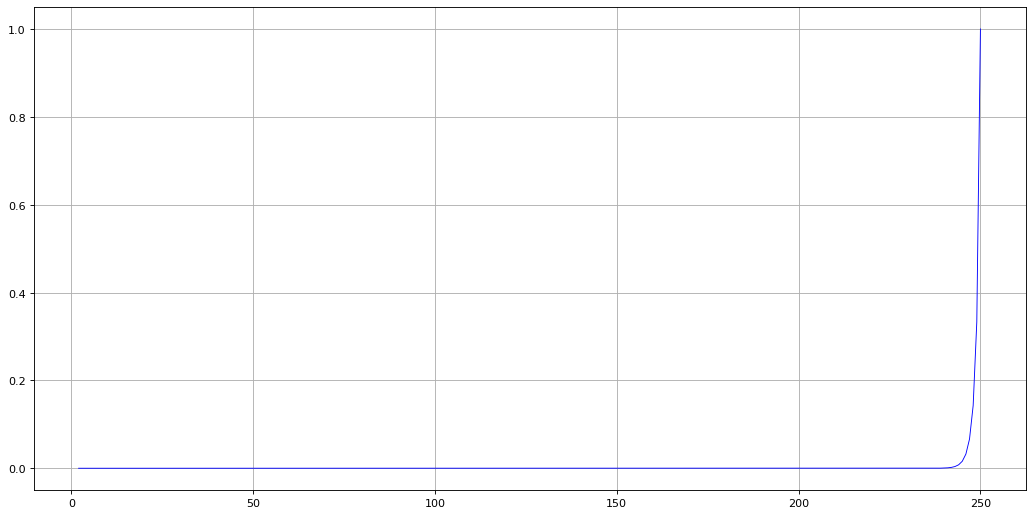

In [61]:
import matplotlib.pyplot as plt
plt.close('all')

plt.figure(figsize=(16, 8), dpi=80)
plt.grid(True)

N = 250
plt.plot(range(2, N + 1), list(2 ** n / (2 ** (N + 1) - 2 ** n) for n in range(2, N + 1)), 'b-', linewidth=0.8)

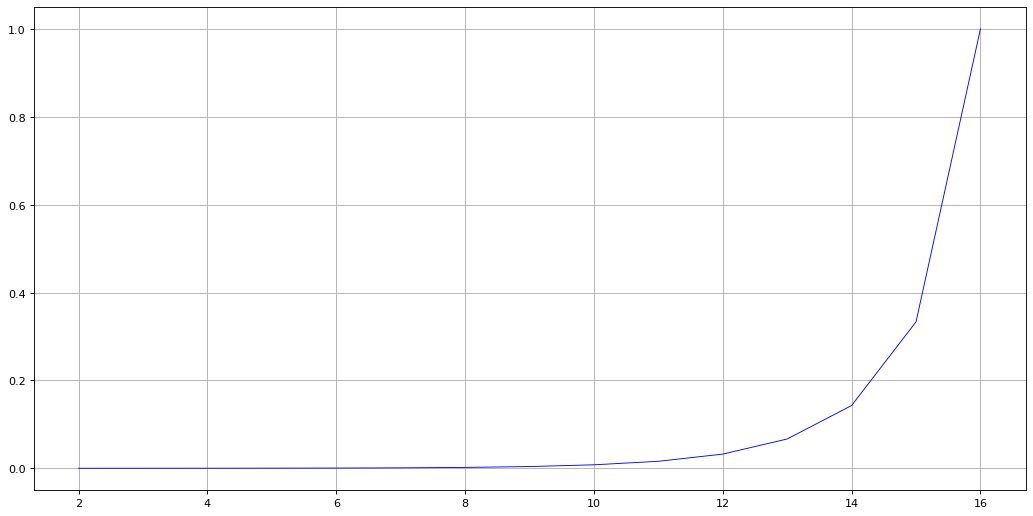

In [62]:
import matplotlib.pyplot as plt
plt.close('all')

plt.figure(figsize=(16, 8), dpi=80)
plt.grid(True)

A = 2
N = 16
plt.plot(range(2, N + 1), list((A ** (n + 1) - A ** n) / (A ** (N + 1) - A ** n) for n in range(2, N + 1)), 'b-', linewidth=0.8)

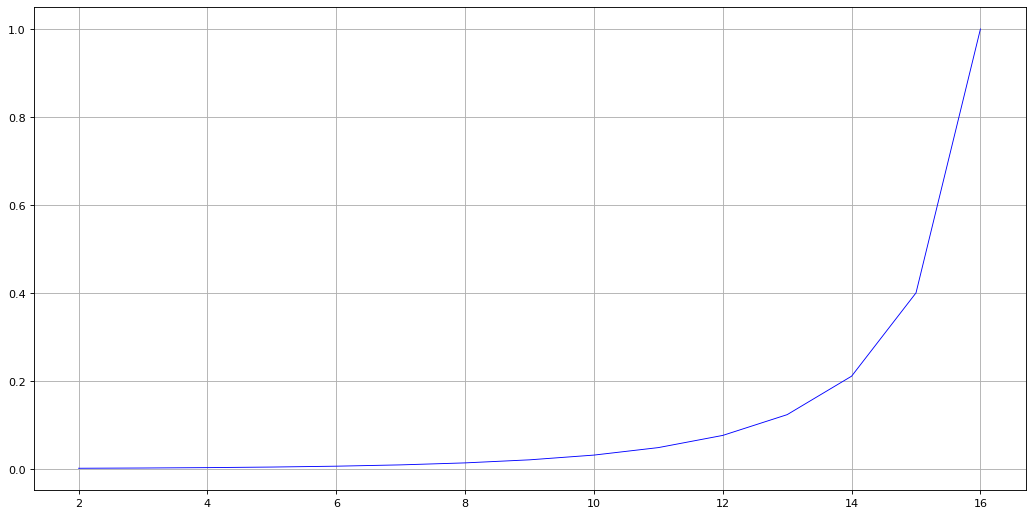

In [63]:
import matplotlib.pyplot as plt
plt.close('all')

plt.figure(figsize=(16, 8), dpi=80)
plt.grid(True)

A = 1.5
N = 16
plt.plot(range(2, N + 1), list((A ** (n + 1) - A ** n) / (A ** (N + 1) - A ** n) for n in range(2, N + 1)), 'b-', linewidth=0.8)

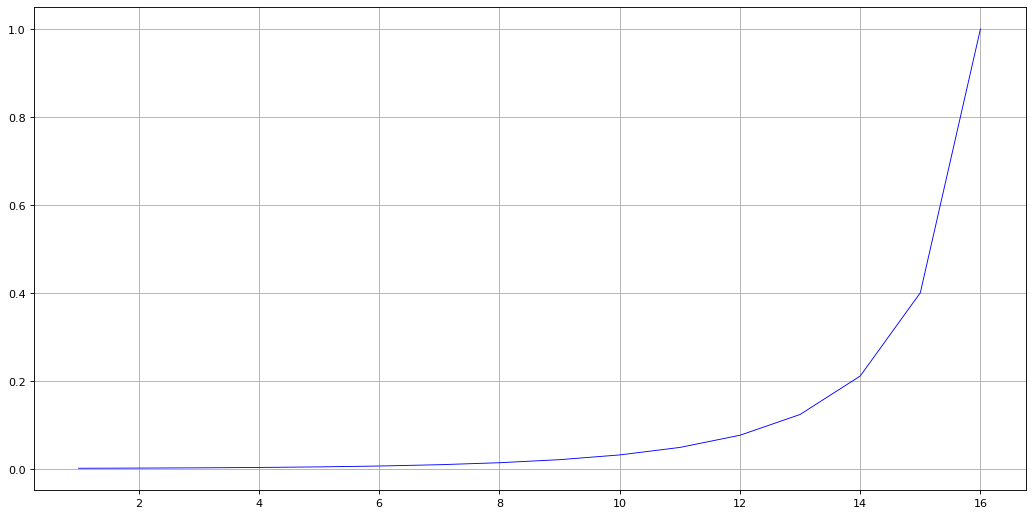

In [64]:
import matplotlib.pyplot as plt
plt.close('all')

plt.figure(figsize=(16, 8), dpi=80)
plt.grid(True)

A = 1.5
N = 16
plt.plot(range(1, N + 1), list((A ** (n + 1) - A ** n) / (A ** (N + 1) - A ** n) for n in range(1, N + 1)), 'b-', linewidth=0.8)

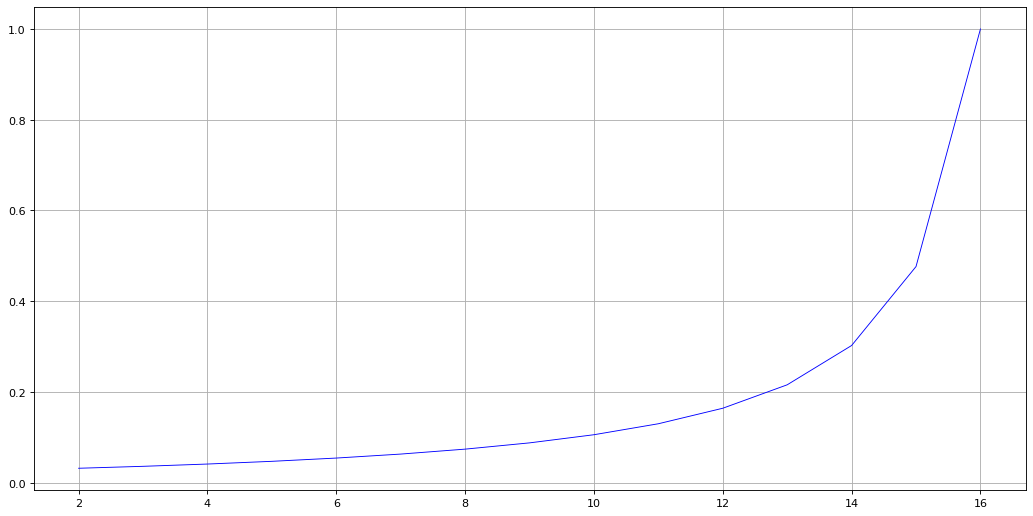

In [65]:
import matplotlib.pyplot as plt
plt.close('all')

plt.figure(figsize=(16, 8), dpi=80)
plt.grid(True)

A = 1.1
N = 16
plt.plot(range(2, N + 1), list((A ** (n + 1) - A ** n) / (A ** (N + 1) - A ** n) for n in range(2, N + 1)), 'b-', linewidth=0.8)

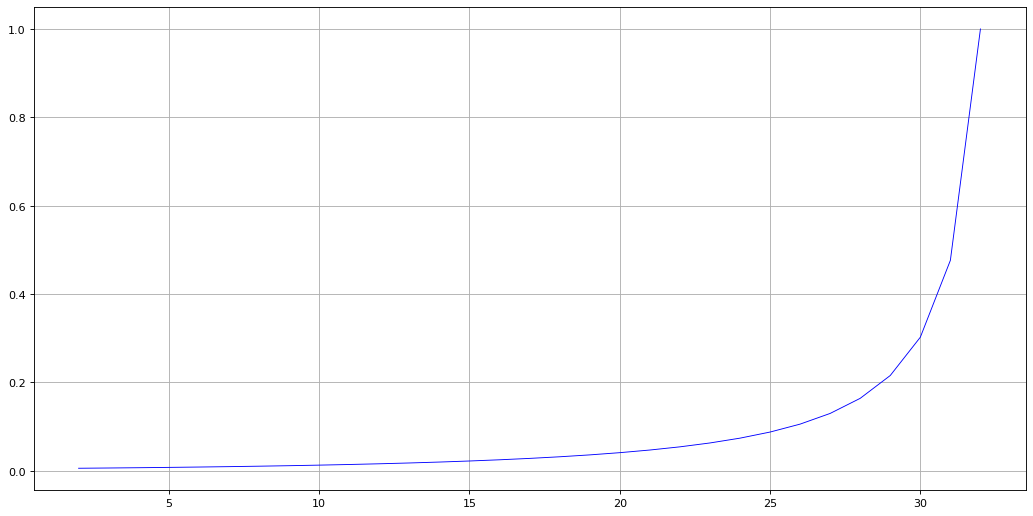

In [66]:
import matplotlib.pyplot as plt
plt.close('all')

plt.figure(figsize=(16, 8), dpi=80)
plt.grid(True)

A = 1.1
N = 32
plt.plot(range(2, N + 1), list((A ** (n + 1) - A ** n) / (A ** (N + 1) - A ** n) for n in range(2, N + 1)), 'b-', linewidth=0.8)

In [67]:
MAX_UNIT_CC_GAIN_JPY = 250
A, N = 1.5, 16
now_sell_jpy = 37556
used_jpy = 37327 * 0.1
bought_unit_amount = 1
bought_amount = 0.1
n = (now_sell_jpy - used_jpy/bought_amount) / (MAX_UNIT_CC_GAIN_JPY / N)
please_sell_unit_amount = int(bought_unit_amount * (A - 1) / (A ** (N + 1 - n) - 1)) if n <= N else bought_unit_amount
print(please_sell_unit_amount)

0


In [68]:
MAX_UNIT_CC_GAIN_JPY = 250
A, N = 1.5, 16
now_sell_jpy = 37596
used_jpy = 37327 * 0.1
bought_unit_amount = 1
bought_amount = 0.1
n = (now_sell_jpy - used_jpy/bought_amount) / (MAX_UNIT_CC_GAIN_JPY / N)
please_sell_unit_amount = int(bought_unit_amount * (A - 1) / (A ** (N + 1 - n) - 1)) if n <= N else bought_unit_amount
print(please_sell_unit_amount)

1
